In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
print(dir(iris))
print(iris.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


0 : <0-49>    : Setosa <br>
1 : <50-99>   : versicolor <br>
2 : <100-149> : Virginica

In [23]:
x = df.drop(['target', 'flower_name'], axis='columns')
y = df.target 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=10)
model.fit(train_x, train_y)

y_predicted = model.predict(test_x)

In [16]:
print("Model Score with 10 Estimators -> 10 Decision Trees:", model.score(test_x, test_y))

Model Score with 10 Estimators -> 10 Decision Trees: 0.9333333333333333


Building Confusion Matrix 

[[10  0  0]
 [ 0  6  1]
 [ 0  0 13]]


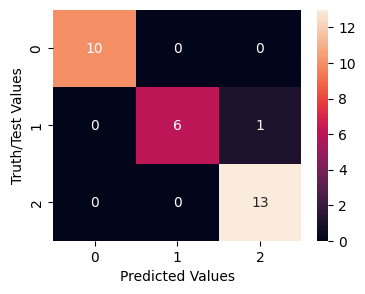

In [36]:
cm = confusion_matrix(test_y, y_predicted)
plt.figure(figsize=(4,3))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth/Test Values')
print(cm)